# <u>Les bases de l'apprentissage automatique</u>

Pour approfondir : [ScienceEtonnante - Le Deep Learning](https://www.youtube.com/watch?v=trWrEWfhTVg)

### L'objectif est de modéliser une fonction linéaire à partir d'un ensemble de points.

In [1]:
import numpy as np

# Fonction à modéliser
def f(x):
    return 0.58 * x - 13.7

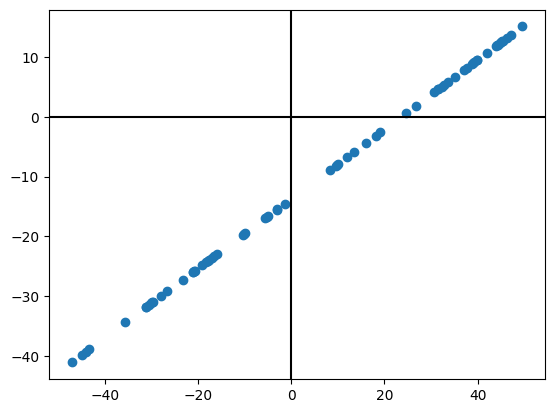

In [3]:
# Génération des points entre -100 et 100
x = np.random.random(70) * 100 - 50
y = np.array([f(i) for i in x])

import matplotlib.pyplot as plt

plt.scatter(x, y)
plt.axvline(x=0, c="black")
plt.axhline(y=0, c="black")
plt.show()

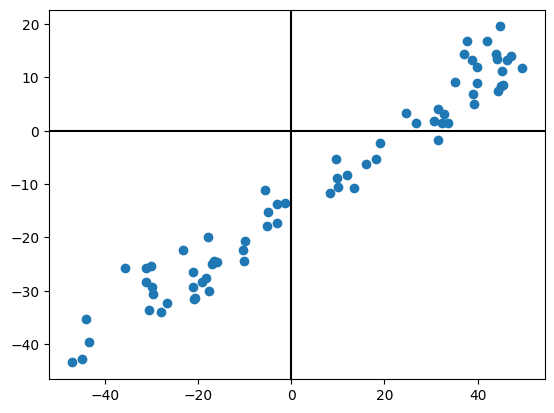

In [4]:
# Ajout d'un bruit aléatoire
noised_y = y + np.random.normal(0, 4, size=len(x))

plt.scatter(x, noised_y)
plt.axvline(x=0, c="black")
plt.axhline(y=0, c="black")
plt.show()

### Création du modèle

On utilise ici un réseau de neurones "dense" ou "fully connected" composé d'1 couche de 4 neurones.

2022-10-11 11:08:00.154743: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
2022-10-11 11:08:00.681380: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcudart.so.11.0'; dlerror: libcudart.so.11.0: cannot open shared object file: No such file or directory; LD_LIBRARY_PATH: /usr/include:
2022-10-11 11:08:00.681412: I tensorflow/stream_executor/cuda/cudart_stub.cc:29] Ignore above cudart dlerror if you do not have a GPU set up on your machine.
2022-10-11 11:08:00.742724: E tensorflow/stream_executor/cuda/cuda_blas.cc:2981] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2022-10-11 11:08:01.976417: W tensor

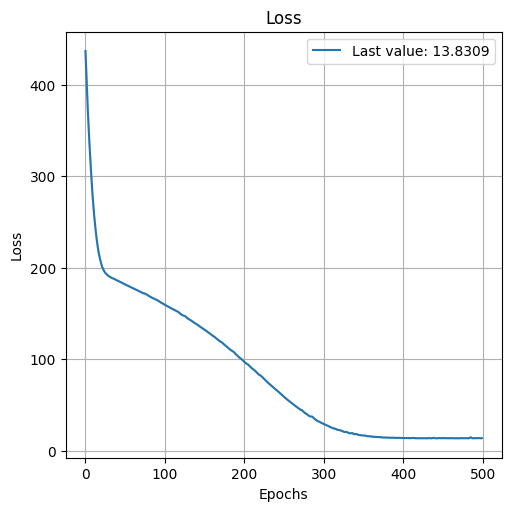

In [5]:
from keras import Sequential
from keras.layers import Dense, Input
from plot_keras_history import show_history

model = Sequential([
    Dense(8, input_shape=(1,), activation="linear"),
    Dense(4, activation="linear"),
    Dense(1)
])

model.compile(optimizer="adam", loss="mse")
history = model.fit(x, noised_y, epochs=500, verbose=0)
show_history(history)

Vérifions maintenant que le modèle est efficace ! \
D'abord en mesurant l'écart avec la fonction originale sur des valeurs aléatoires.

In [6]:
test = np.random.uniform(-300, 300, size=5)
real = np.array([f(i) for i in test])
prediction = model.predict(test)[:,0]

for i in range(len(test)):
    print(f'f({test[i]:.2f}) = {real[i]:.2f} | prediction = {prediction[i]:.2f}')
    
print(f'\nErreur absolue moyenne : {np.mean(abs(real - prediction))}')

print(f'En utilisant l\'API Keras, erreur moyenne carrée : {model.evaluate(test, real)}')

1/1 [==============================] - 0s 121ms/step
f(-212.15) = -136.74 | prediction = -134.06
f(110.24) = 50.24 | prediction = 48.43
f(95.78) = 41.86 | prediction = 40.25
f(-35.80) = -34.47 | prediction = -34.24
f(170.90) = 85.42 | prediction = 82.77

Erreur absolue moyenne : 1.7955355620535811
1/1 [==============================] - 0s 136ms/step - loss: 4.0293
En utilisant l'API Keras, erreur moyenne carrée : 4.029302597045898


On peut aussi comparer graphiquement.

3/3 [==============================] - 0s 4ms/step


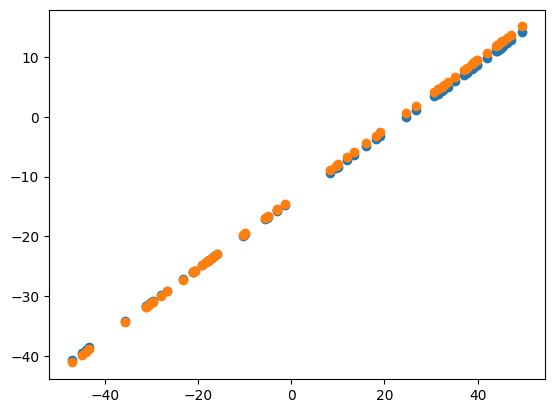

In [7]:
test = [i - 50 for i in range(100)]
prediction = model.predict(x)
real = [f(i) for i in x]

plt.scatter(x, prediction, label="predicted")
plt.scatter(x, real, label="real")
plt.show()

2/2 [==============================] - 0s 4ms/step


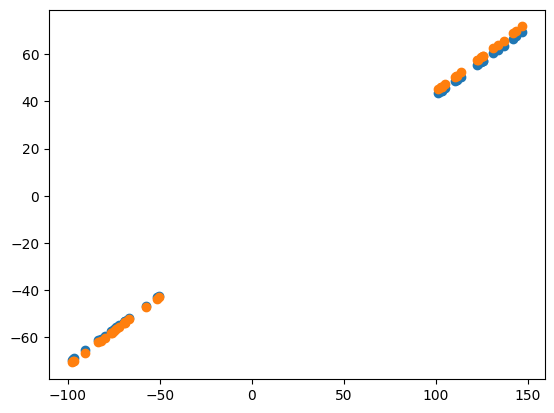

In [8]:
new_x = np.append(np.random.random(20) * 50 + 100, np.random.random(20) * 50 - 100)
new_y = [f(i) for i in new_x]
new_predicted_y = model.predict(new_x)

plt.scatter(new_x, new_predicted_y, label="predicted")
plt.scatter(new_x, new_y, label="real")
plt.show()

In [ ]:
x_train, x_test, y_train, y_test = train_test_split(x, y, 0.2)